In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [38]:
df = sns.load_dataset("titanic")  
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked']].copy()
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [39]:
display(df.describe(include='all'))


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [40]:
df['age'] = df['age'].fillna(df['age'].mean())

In [41]:
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [42]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [43]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [44]:
df['FamilySize'] = df['sibsp'] + df['parch']

In [45]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [46]:
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True, dtype=int)

In [47]:
df.head(10)

,survived,pclass,age,sibsp,parch,fare,FamilySize,sex_male,embarked_Q,embarked_S
0,0,3,22.000000,1,0,7.2500,1,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,1
5,0,3,29.699118,0,0,8.4583,0,1,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,1
7,0,3,2.000000,3,1,21.0750,4,1,0,1
8,1,3,27.000000,0,2,11.1333,2,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,0,0


In [48]:
X = df.drop("survived", axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [50]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": auc(*roc_curve(y_test, y_prob)[:2])
    }
    results.append(metrics)

pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.804469,0.793103,0.666667,0.724409,0.843083
1,Decision Tree,0.765363,0.690141,0.710145,0.700000,0.740777
2,Random Forest,0.810056,0.769231,0.724638,0.746269,0.836166


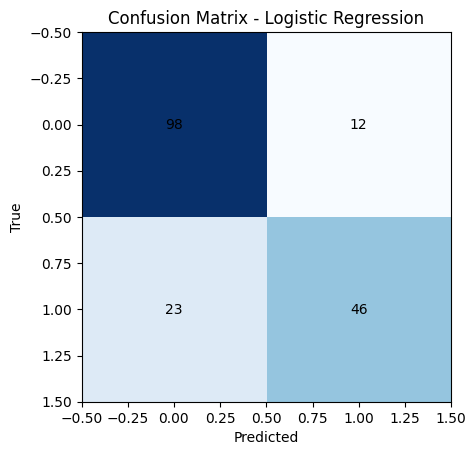

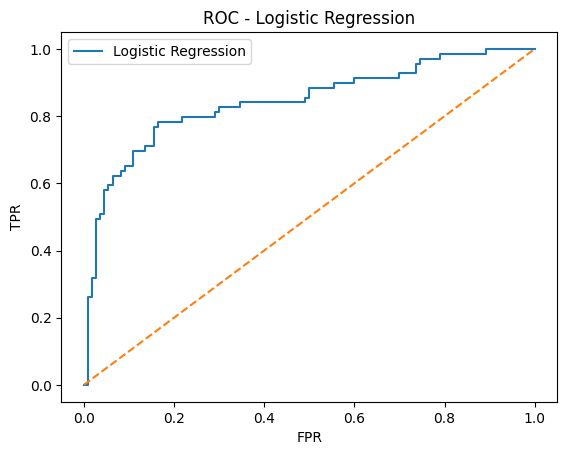

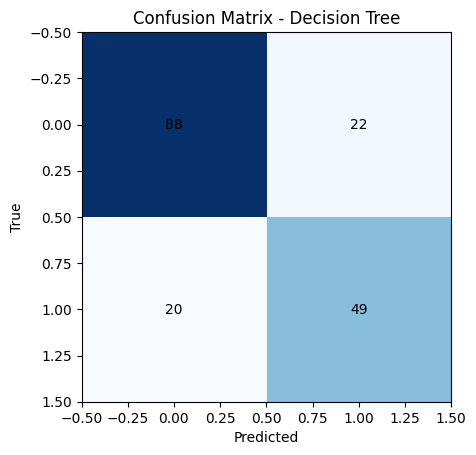

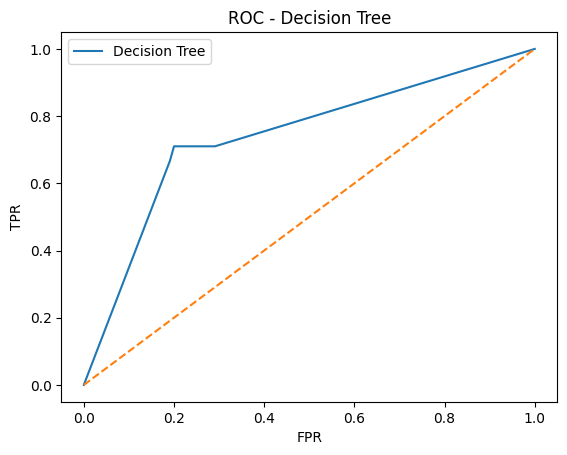

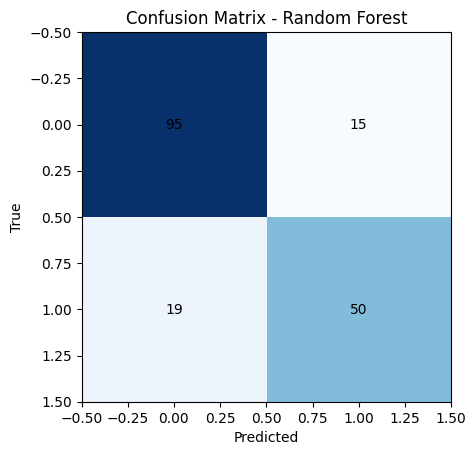

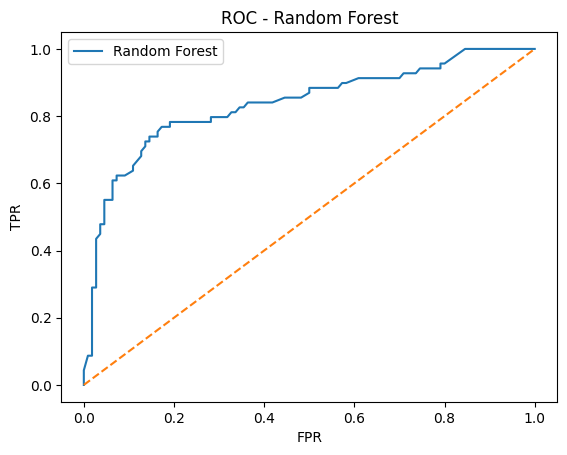

In [51]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for (i,j), val in np.ndenumerate(cm):
        plt.text(j, i, val, ha="center", va="center")
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f"{name}")
    plt.plot([0,1],[0,1],'--')
    plt.title(f"ROC - {name}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()


In [52]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=cv, scoring="f1")
tree_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=cv, scoring="f1")

print("Logistic Regression CV F1:", logreg_scores.mean())
print("Decision Tree CV F1:", tree_scores.mean())

param_dist = {
    "n_estimators": [100,200,500],
    "max_depth": [None, 4,6,8,12],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

rnd = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20, scoring="f1", cv=cv, n_jobs=-1, random_state=42
)
rnd.fit(X_train, y_train)
print("Best RF params:", rnd.best_params_)


Logistic Regression CV F1: 0.7196301103142544
Decision Tree CV F1: 0.7059606592125243
Best RF params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12}
